 **Librerias necesarias para trabajar los datos ** 

In [1]:

!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 16.2 MB/s 


In [2]:
import pandas as pd
import numpy as np
import datetime
import csv
import matplotlib.pyplot  as plt
import sweetviz as sv
import IPython

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials



Descargar datos de colecta intradomiciliaria de mosquitos del año 2019 de un link en google Drive. El archivo se puede actualizar para ampliar en el tiempo la informacion 

In [3]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

fileDownloaded = drive.CreateFile({'id' :'1fc1dYGm7PYJ4ZLv1f1i7LdwAnnfYFgsz'})


In [4]:
fileDownloaded.GetContentFile('Hoja de trabajo Entomología 2019.xlsx')

Revisar la primera hoja del archivo excel de colecta intradomiciliaria de mosquitos del 2019

In [5]:
df = pd.read_excel('Hoja de trabajo Entomología 2019.xlsx', sheet_name='Hoja1')

df.describe()



/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Clave LESP,Fecha de recepción,Jurisdicción,Fecha de colecta,Fecha de diagnóstico,Hembra,Macho,Fecha de análisis (PCR/RAMP)
count,1287.000000,1287.000000,1287.000000,1286.000000,1.287000e+03,1504.000000,1422.000000,136.000000
mean,650.705517,190793.897436,1.006993,190791.404355,2.121236e+05,3.769947,4.451477,190827.617647
std,373.552111,258.150158,0.144729,260.547830,1.901380e+05,5.683163,7.086882,239.969537
min,1.000000,190125.000000,1.000000,190124.000000,1.901310e+05,1.000000,0.000000,190401.000000
25%,329.500000,190605.000000,1.000000,190531.000000,1.906060e+05,1.000000,1.000000,190613.000000
50%,652.000000,190806.000000,1.000000,190806.000000,1.908120e+05,2.000000,2.000000,190903.000000
75%,973.500000,191016.000000,1.000000,191016.000000,1.910210e+05,4.000000,5.000000,191025.000000
max,1295.000000,191293.000000,4.000000,191219.000000,1.906121e+06,98.000000,83.000000,191115.000000


In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Clave LESP                    1287 non-null   float64
 1   Fecha de recepción            1287 non-null   float64
 2   Jurisdicción                  1287 non-null   float64
 3   Localidad                     1287 non-null   object 
 4   Sector                        1280 non-null   object 
 5   Manzana                       1286 non-null   object 
 6   Fecha de colecta              1286 non-null   float64
 7   Fecha de diagnóstico          1287 non-null   float64
 8   Diagnóstico                   1923 non-null   object 
 9   Hembra                        1504 non-null   float64
 10  Macho                         1422 non-null   float64
 11  Fecha de análisis (PCR/RAMP)  136 non-null    float64
 12  Dengue                        133 non-null    object 
 13  Chi

**Eliminar datos inesesarios para el analisis y que pueden ser de sensibles** 

In [7]:
df1= df.drop(columns =
              ['Dengue','Fecha de análisis (PCR/RAMP)','Chikungunya','Zika','Virus del Oeste del Nilo','Jurisdicción','Sector','Clave LESP','Manzana','Fecha de recepción','Fecha de diagnóstico', ])
df1

,Localidad,Fecha de colecta,Diagnóstico,Hembra,Macho
0,Guaymas,190124.0,Aedes vexans,2.0,1.0
1,NaN,NaN,Culex quinquefasciatus,1.0,1.0
2,Guaymas,190124.0,Aedes vexans,27.0,2.0
3,Guaymas,190124.0,Culex quinquefasciatus,17.0,5.0
4,Hermosillo,NaN,Aedes aegypti,NaN,1.0
...,...,...,...,...,...
1918,Hermosillo,191219.0,Aedes aegypti,1.0,NaN
1919,Hermosillo,191219.0,Aedes aegypti,8.0,6.0
1920,NaN,NaN,Culex quinquefasciatus,1.0,1.0
1921,Hermosillo,191219.0,Aedes aegypti,2.0,2.0


**Rellenar dados faltantes**

In [8]:
df1 = df1.fillna(method="pad")
df1


,Localidad,Fecha de colecta,Diagnóstico,Hembra,Macho
0,Guaymas,190124.0,Aedes vexans,2.0,1.0
1,Guaymas,190124.0,Culex quinquefasciatus,1.0,1.0
2,Guaymas,190124.0,Aedes vexans,27.0,2.0
3,Guaymas,190124.0,Culex quinquefasciatus,17.0,5.0
4,Hermosillo,190124.0,Aedes aegypti,17.0,1.0
...,...,...,...,...,...
1918,Hermosillo,191219.0,Aedes aegypti,1.0,2.0
1919,Hermosillo,191219.0,Aedes aegypti,8.0,6.0
1920,Hermosillo,191219.0,Culex quinquefasciatus,1.0,1.0
1921,Hermosillo,191219.0,Aedes aegypti,2.0,2.0


**Cambiar el tipo de dato de Fecha de colecta de objeto a fecha**  

In [9]:
df1['Fecha de colecta'] = pd.to_datetime(df1['Fecha de colecta'], format='%y%m%d')  
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Localidad         1923 non-null   object        
 1   Fecha de colecta  1923 non-null   datetime64[ns]
 2   Diagnóstico       1923 non-null   object        
 3   Hembra            1923 non-null   float64       
 4   Macho             1923 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 75.2+ KB


**Filtra datos solo de la localidad de Hemoisllo para realizar el analisis**

In [10]:
df1_mask = df1['Localidad']=='Hermosillo'
df1h = df1[df1_mask]

df1h

,Localidad,Fecha de colecta,Diagnóstico,Hembra,Macho
4,Hermosillo,2019-01-24,Aedes aegypti,17.0,1.0
5,Hermosillo,2019-01-24,Culex quinquefasciatus,17.0,1.0
6,Hermosillo,2019-03-08,Aedes aegypti,1.0,1.0
7,Hermosillo,2019-03-08,Culex quinquefasciatus,2.0,1.0
8,Hermosillo,2019-03-08,Muestra Repetida,2.0,1.0
...,...,...,...,...,...
1918,Hermosillo,2019-12-19,Aedes aegypti,1.0,2.0
1919,Hermosillo,2019-12-19,Aedes aegypti,8.0,6.0
1920,Hermosillo,2019-12-19,Culex quinquefasciatus,1.0,1.0
1921,Hermosillo,2019-12-19,Aedes aegypti,2.0,2.0


In [11]:
df1h.rename(
    columns={"Fecha de colecta": "Fecha"}, 
    inplace=True
)
df1h

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Localidad,Fecha,Diagnóstico,Hembra,Macho
4,Hermosillo,2019-01-24,Aedes aegypti,17.0,1.0
5,Hermosillo,2019-01-24,Culex quinquefasciatus,17.0,1.0
6,Hermosillo,2019-03-08,Aedes aegypti,1.0,1.0
7,Hermosillo,2019-03-08,Culex quinquefasciatus,2.0,1.0
8,Hermosillo,2019-03-08,Muestra Repetida,2.0,1.0
...,...,...,...,...,...
1918,Hermosillo,2019-12-19,Aedes aegypti,1.0,2.0
1919,Hermosillo,2019-12-19,Aedes aegypti,8.0,6.0
1920,Hermosillo,2019-12-19,Culex quinquefasciatus,1.0,1.0
1921,Hermosillo,2019-12-19,Aedes aegypti,2.0,2.0


In [12]:
#df1h = df1h.set_index('Fecha')

#df1h

 **Crear una nueva columna que sume el total de mosquitos **

In [13]:
df1h['MosquitosT'] = df1h['Hembra'] + df1h['Macho']
#dfth['MosquitosT'] = dfth['Hembra'] + dfth['Macho']

df1h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 4 to 1922
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Localidad    1896 non-null   object        
 1   Fecha        1896 non-null   datetime64[ns]
 2   Diagnóstico  1896 non-null   object        
 3   Hembra       1896 non-null   float64       
 4   Macho        1896 non-null   float64       
 5   MosquitosT   1896 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 103.7+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df1h_mask = df1h['Diagnóstico']=='Aedes aegypti'
dfaa = df1h[df1h_mask]
#dfth = dft[dft.Localidad.eq('Hermosillo')]
dfaa

,Localidad,Fecha,Diagnóstico,Hembra,Macho,MosquitosT
4,Hermosillo,2019-01-24,Aedes aegypti,17.0,1.0,18.0
6,Hermosillo,2019-03-08,Aedes aegypti,1.0,1.0,2.0
9,Hermosillo,2019-03-15,Aedes aegypti,2.0,1.0,3.0
10,Hermosillo,2019-03-15,Aedes aegypti,2.0,1.0,3.0
12,Hermosillo,2019-03-15,Aedes aegypti,1.0,1.0,2.0
...,...,...,...,...,...,...
1915,Hermosillo,2019-12-19,Aedes aegypti,7.0,2.0,9.0
1916,Hermosillo,2019-12-19,Aedes aegypti,3.0,2.0,5.0
1918,Hermosillo,2019-12-19,Aedes aegypti,1.0,2.0,3.0
1919,Hermosillo,2019-12-19,Aedes aegypti,8.0,6.0,14.0


In [15]:
dfaa2 = dfaa.groupby('Fecha').sum()
dfaa2

,Hembra,Macho,MosquitosT
Fecha,,,
2019-01-24,17.0,1.0,18.0
2019-03-08,1.0,1.0,2.0
2019-03-15,10.0,9.0,19.0
2019-03-21,4.0,6.0,10.0
2019-03-22,8.0,8.0,16.0
...,...,...,...
2019-12-13,58.0,44.0,102.0
2019-12-16,41.0,27.0,68.0
2019-12-17,40.0,24.0,64.0


In [16]:
df2 = df1h.groupby('Fecha').sum()
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 2019-01-24 to 2019-12-19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hembra      167 non-null    float64
 1   Macho       167 non-null    float64
 2   MosquitosT  167 non-null    float64
dtypes: float64(3)
memory usage: 5.2 KB


,Hembra,Macho,MosquitosT
Fecha,,,
2019-01-24,34.0,2.0,36.0
2019-03-08,5.0,3.0,8.0
2019-03-15,13.0,13.0,26.0
2019-03-21,11.0,15.0,26.0
2019-03-22,19.0,14.0,33.0
...,...,...,...
2019-12-13,91.0,46.0,137.0
2019-12-16,53.0,48.0,101.0
2019-12-17,48.0,28.0,76.0


In [17]:
df3 = pd.merge(df2, dfaa2["Hembra"], how="left", on="Fecha")
#df2 = df2.drop_duplicates()
df3

,Hembra_x,Macho,MosquitosT,Hembra_y
Fecha,,,,
2019-01-24,34.0,2.0,36.0,17.0
2019-03-08,5.0,3.0,8.0,1.0
2019-03-15,13.0,13.0,26.0,10.0
2019-03-21,11.0,15.0,26.0,4.0
2019-03-22,19.0,14.0,33.0,8.0
...,...,...,...,...
2019-12-13,91.0,46.0,137.0,58.0
2019-12-16,53.0,48.0,101.0,41.0
2019-12-17,48.0,28.0,76.0,40.0


In [18]:
df3['PMosquitosAaH'] = (df3['Hembra_y'] / df3['MosquitosT'])*100

df3.describe()

,Hembra_x,Macho,MosquitosT,Hembra_y,PMosquitosAaH
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,43.173653,51.820359,94.994012,25.305389,28.027962
std,31.825386,42.692838,66.796625,22.674946,13.172498
min,3.000000,2.000000,5.000000,1.000000,0.793651
25%,18.500000,19.500000,43.000000,10.000000,17.658847
50%,38.000000,42.000000,84.000000,19.000000,27.472527
75%,57.500000,74.500000,135.500000,34.500000,37.553419
max,208.000000,294.000000,367.000000,117.000000,69.105691


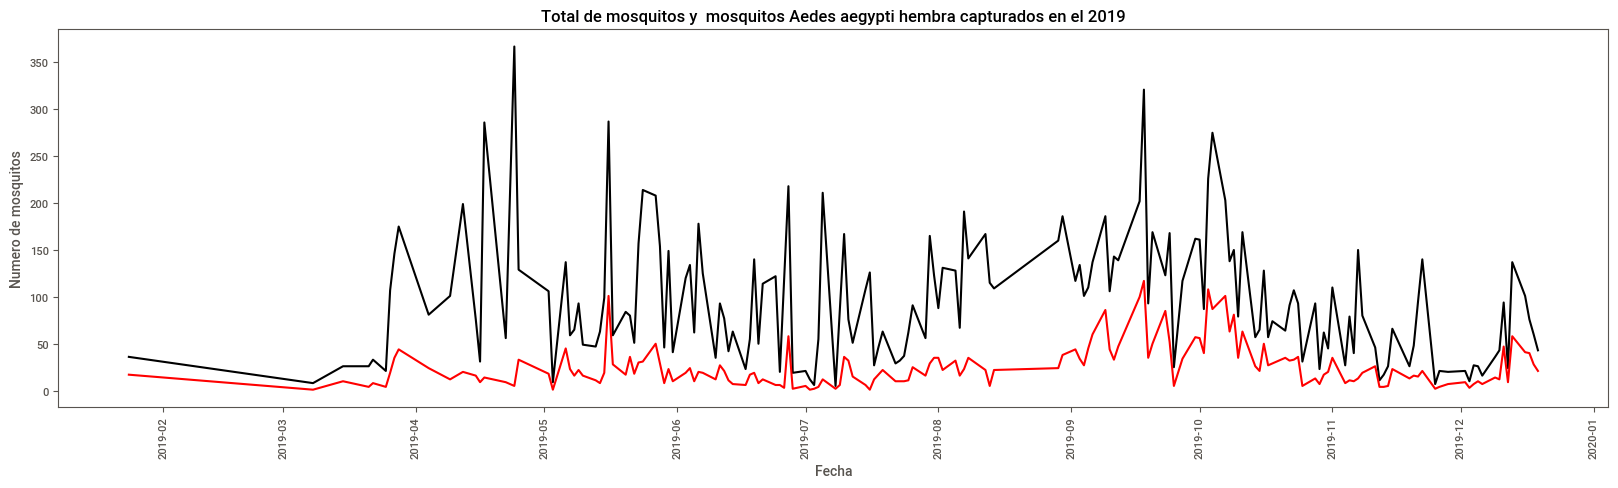

In [39]:
plt.figure(figsize=(20, 5))
#total de mosquitos
plt.plot ( df3['MosquitosT'],color="black")
#mosquitos Hembra de A. aegypti
plt.plot( df3['Hembra_y'],color="red")

plt.xlabel("Fecha")
plt.xticks(rotation = 90)
plt.ylabel("Numero de mosquitos")
plt.title('Total de mosquitos y  mosquitos Aedes aegypti hembra capturados en el 2019')
plt.show()

Base de datos generada de 

https://www.meteored.mx/hermosillo/historico

El archivo en Google Drive se puede actualizar para ampliar en el tiempo la informacion 


In [20]:
#https://drive.google.com/file/d/1u-0KhA0XPTMTNO7Cj20i85G6ceFLCvMf/view?usp=sharing
#https://drive.google.com/file/d/1Q0NICCaJUbX1f4eCqLrX6IMvDL2lwVXW/view?usp=sharing

In [21]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

fileDownloaded = drive.CreateFile({'id' :'1u-0KhA0XPTMTNO7Cj20i85G6ceFLCvMf'})


In [22]:
fileDownloaded.GetContentFile('Temperatura 2019.csv')

In [23]:
dfc = pd.read_csv('Temperatura 2019.csv')
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             365 non-null    object 
 1   Temperatura Med.  365 non-null    float64
 2   Temperatura Max.  365 non-null    float64
 3   Temperatura Min.  365 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


In [24]:
#dfc_mask = dfc['Estación']=='Santa Elena'
#dfc = dfc[dfc_mask]

#dfc

In [25]:
dfc['Fecha'] = pd.to_datetime(dfc['Fecha'])  
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             365 non-null    datetime64[ns]
 1   Temperatura Med.  365 non-null    float64       
 2   Temperatura Max.  365 non-null    float64       
 3   Temperatura Min.  365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [26]:
dfc['Fecha'] = pd.to_datetime(dfc['Fecha'], format='%y%m%d')  
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             365 non-null    datetime64[ns]
 1   Temperatura Med.  365 non-null    float64       
 2   Temperatura Max.  365 non-null    float64       
 3   Temperatura Min.  365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [27]:
#dfc = dfc.set_index('Fecha')


In [28]:
dfc2 = pd.merge(dfc, df3["PMosquitosAaH"], how="left", on=["Fecha"])
#df3
dfc2

,Fecha,Temperatura Med.,Temperatura Max.,Temperatura Min.,PMosquitosAaH
0,2019-01-01,13.0,20.0,8.0,NaN
1,2019-02-01,11.0,17.0,6.0,NaN
2,2019-03-01,10.0,23.0,1.0,NaN
3,2019-04-01,13.0,27.0,3.0,NaN
4,2019-05-01,16.0,25.0,8.0,NaN
...,...,...,...,...,...
360,2019-12-27,15.0,20.0,12.0,NaN
361,2019-12-28,12.0,18.0,7.0,NaN
362,2019-12-29,11.0,19.0,4.0,NaN
363,2019-12-30,11.0,21.0,4.0,NaN


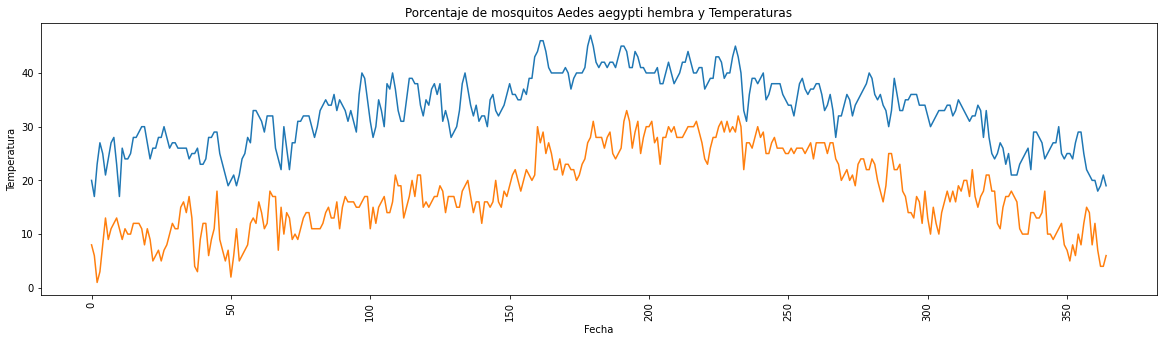

In [29]:

plt.figure(figsize=(20, 5))
plt.plot ( dfc2['Temperatura Max.'])
plt.plot( dfc2['Temperatura Min.'])
#plt.plot(dfc2['Fecha'], dfc2['PMosquitosAaH'])
#plt.twinx(dfc2['PMosquitosAaH'])

plt.xlabel("Fecha")
plt.xticks(rotation = 90)
plt.ylabel("Temperatura")
plt.title('Porcentaje de mosquitos Aedes aegypti hembra y Temperaturas')
plt.show()


<Figure size 5000x500 with 0 Axes>

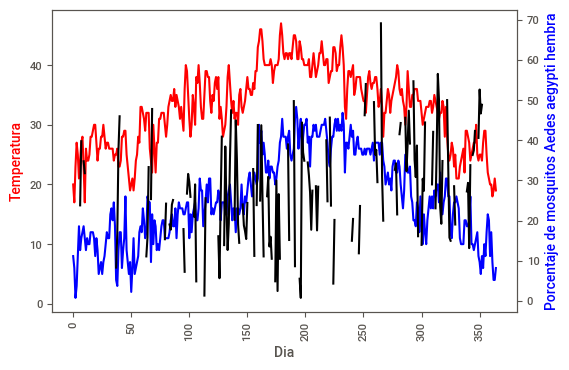

In [36]:
plt.figure(figsize=(50,5))
fig,ax = plt.subplots()
# make a plot
ax.plot(dfc2['Temperatura Max.'],
        color="red")
ax.plot(dfc2['Temperatura Min.'],
        color="blue")

# set x-axis label
ax.set_xlabel("Dia", fontsize = 10)
plt.xticks(rotation = 90)
# set y-axis label
ax.set_ylabel("Temperatura",
              color="red",
              fontsize=10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot( dfc2['PMosquitosAaH'],color="black")
ax2.set_ylabel("Porcentaje de mosquitos Aedes aegypti hembra",color="blue",)
plt.savefig('TempMxMnPMHAa.jpeg')
plt.show()



In [31]:
df4= pd.merge(df3, dfc, how="left", on=["Fecha"])

df4.describe()

,Hembra_x,Macho,MosquitosT,Hembra_y,PMosquitosAaH,Temperatura Med.,Temperatura Max.,Temperatura Min.
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,43.173653,51.820359,94.994012,25.305389,28.027962,26.083832,33.994012,19.041916
std,31.825386,42.692838,66.796625,22.674946,13.172498,6.020460,6.153163,6.570611
min,3.000000,2.000000,5.000000,1.000000,0.793651,14.000000,17.000000,3.000000
25%,18.500000,19.500000,43.000000,10.000000,17.658847,22.000000,30.000000,15.000000
50%,38.000000,42.000000,84.000000,19.000000,27.472527,26.000000,34.000000,18.000000
75%,57.500000,74.500000,135.500000,34.500000,37.553419,31.000000,39.000000,25.000000
max,208.000000,294.000000,367.000000,117.000000,69.105691,38.000000,46.000000,31.000000


In [32]:
df4['Fecha'] = pd.to_datetime(df4['Fecha'], format='%y%m%d')  
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             167 non-null    datetime64[ns]
 1   Hembra_x          167 non-null    float64       
 2   Macho             167 non-null    float64       
 3   MosquitosT        167 non-null    float64       
 4   Hembra_y          167 non-null    float64       
 5   PMosquitosAaH     167 non-null    float64       
 6   Temperatura Med.  167 non-null    float64       
 7   Temperatura Max.  167 non-null    float64       
 8   Temperatura Min.  167 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 13.0 KB


Buscar una relacion en las variables de las temperaturas con respecto a los mosquitos 

In [33]:
analyze_report=sv.analyze(dfc2)
analyze_report.show_html('analyze.html', open_browser=True)


                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



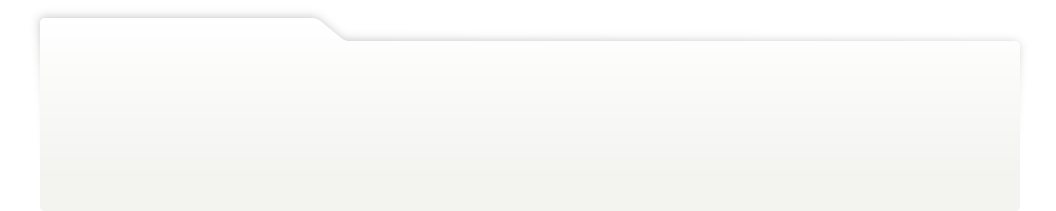
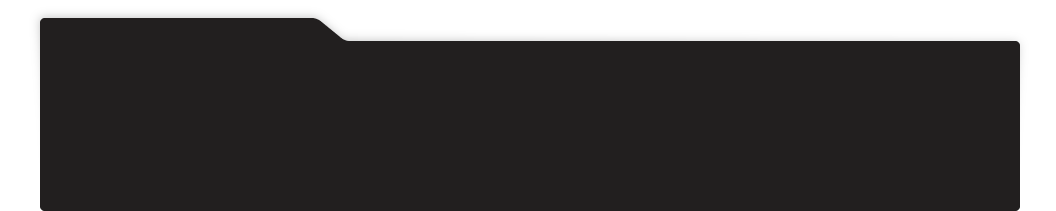
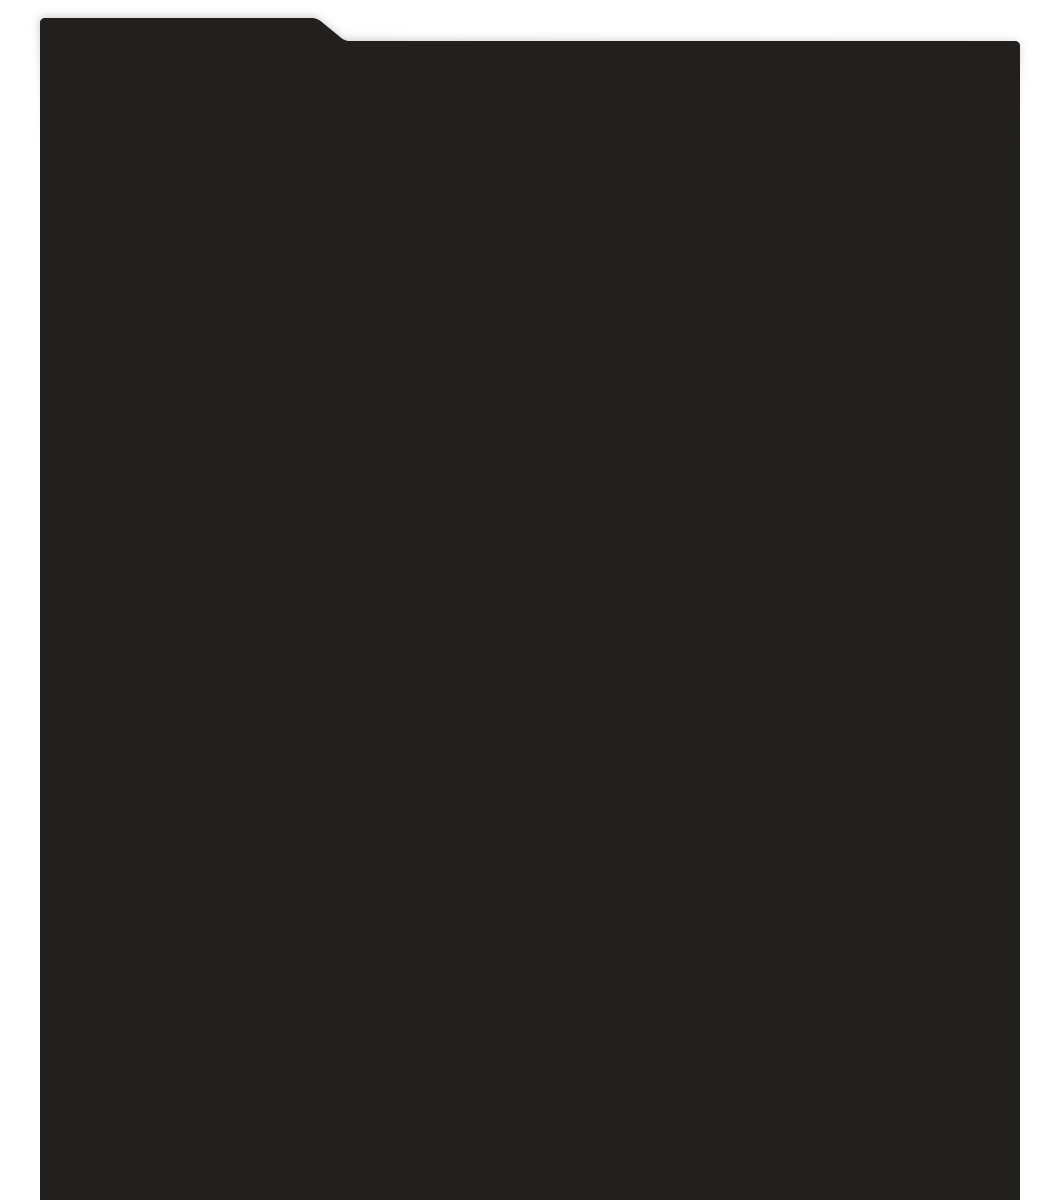
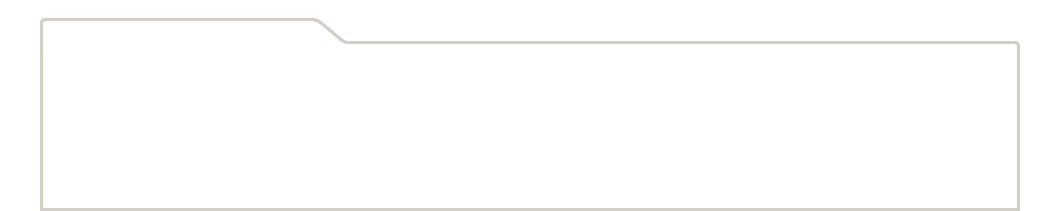
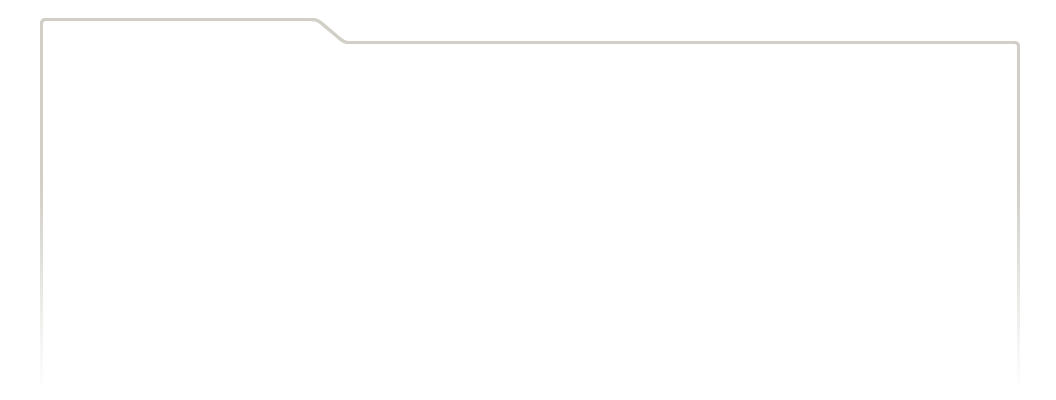
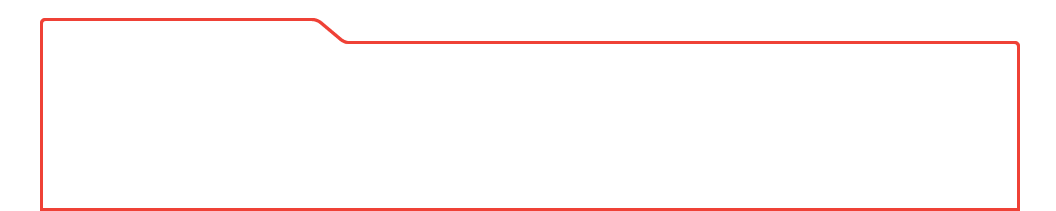
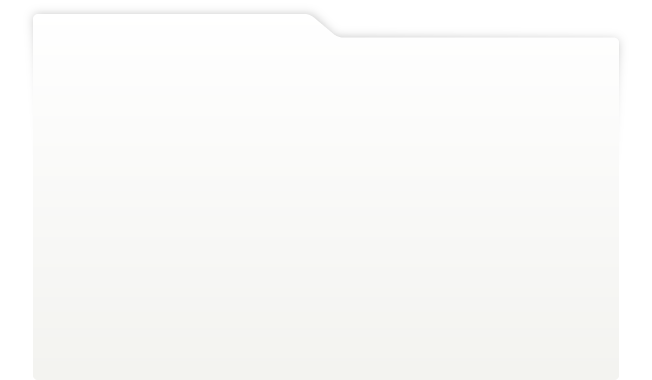
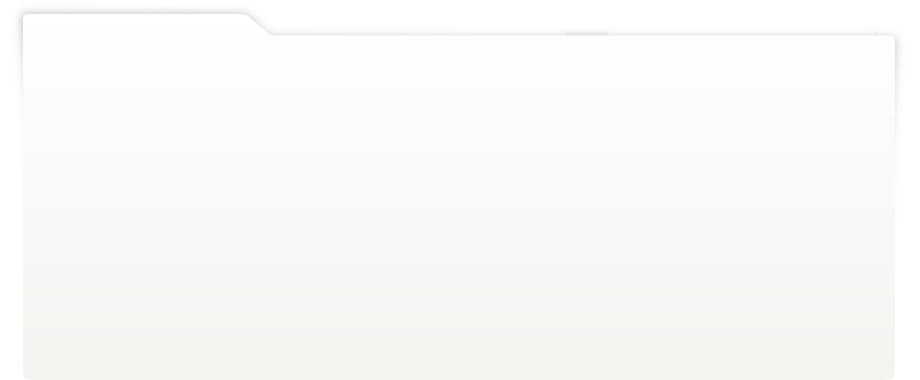
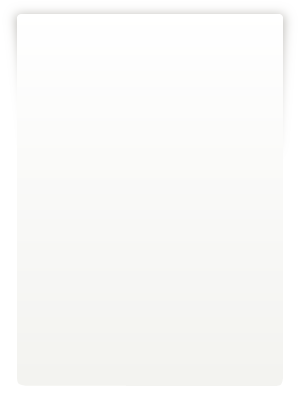
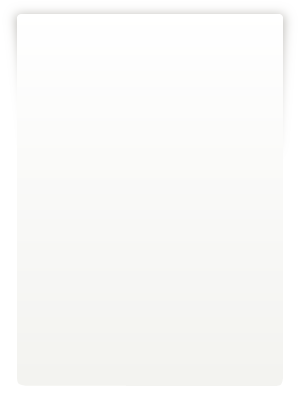
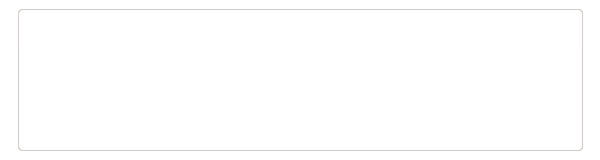
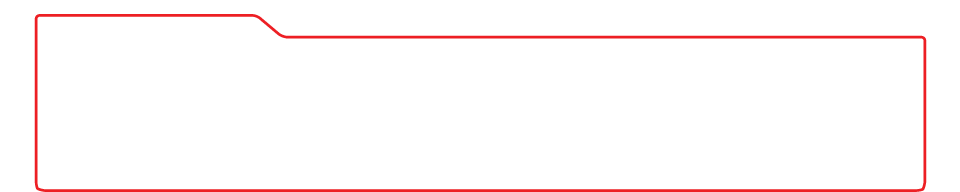
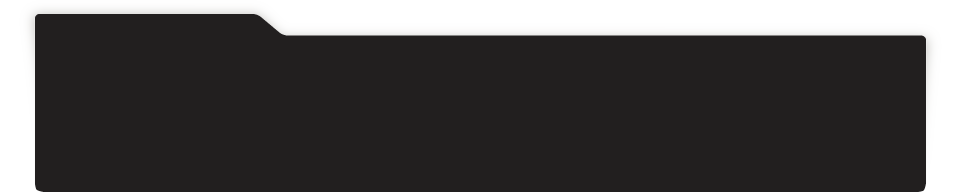
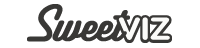
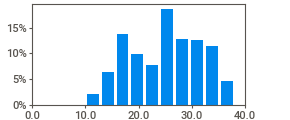
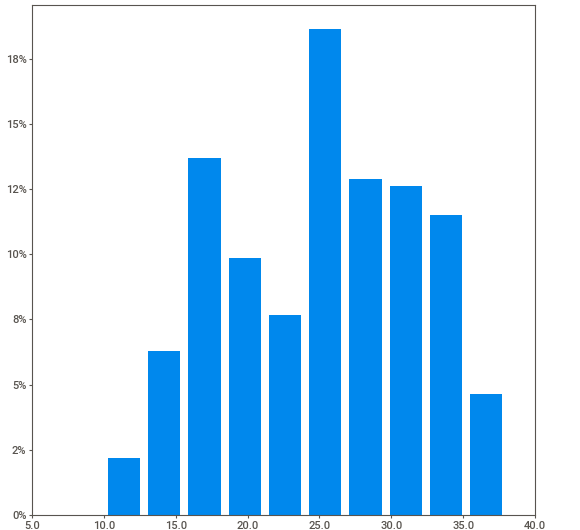
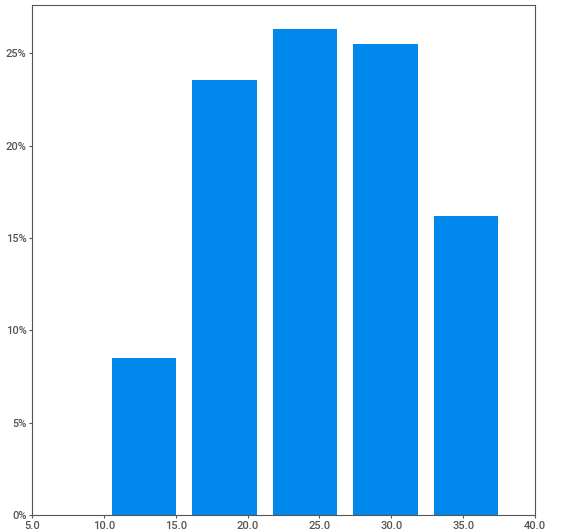
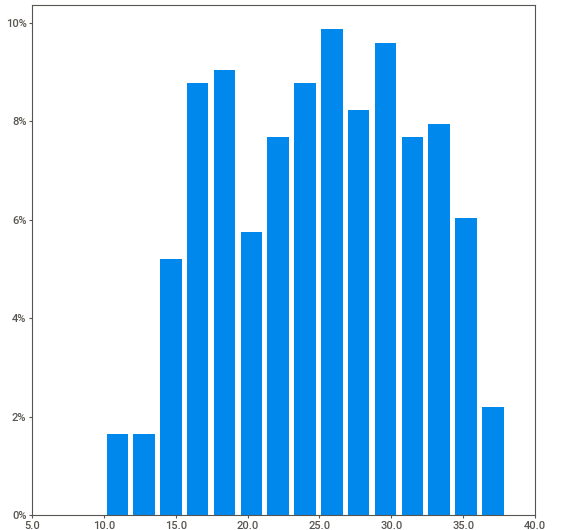
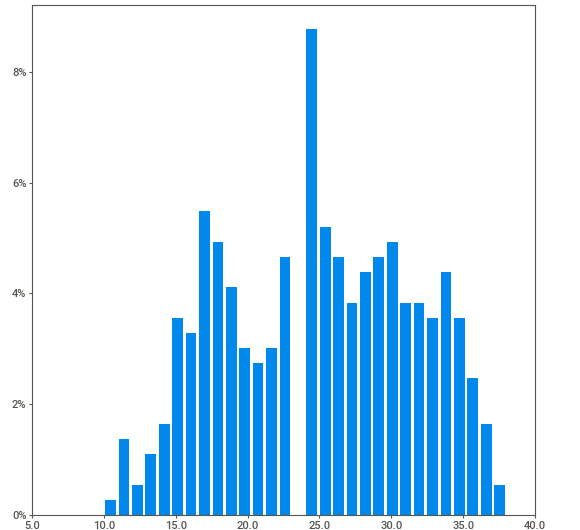
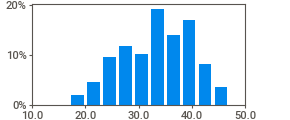
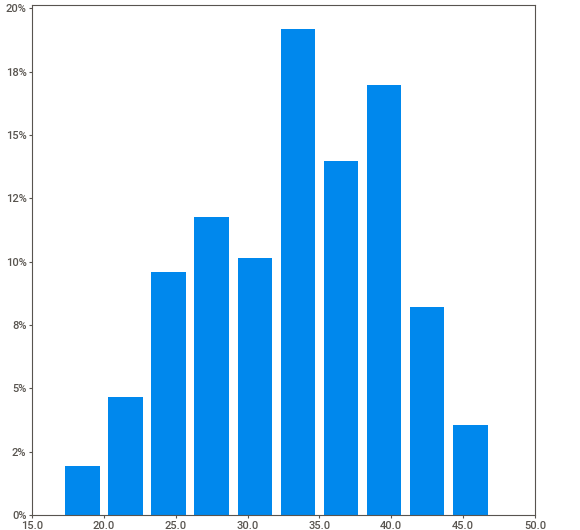
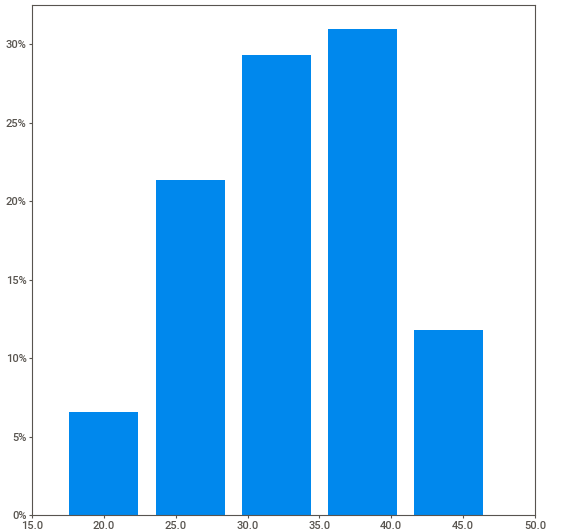
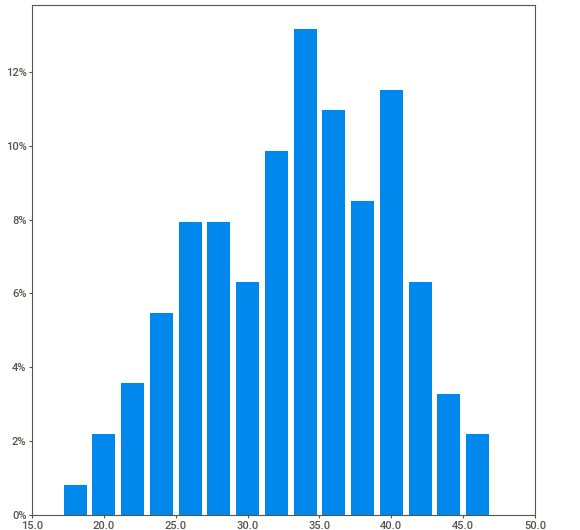
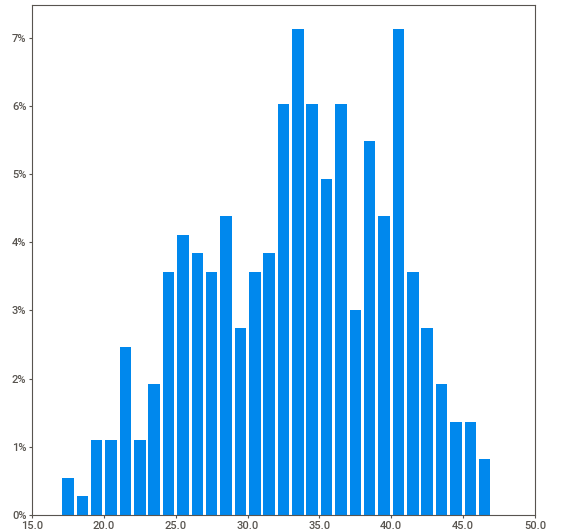
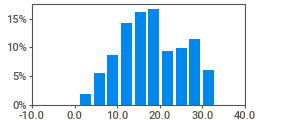
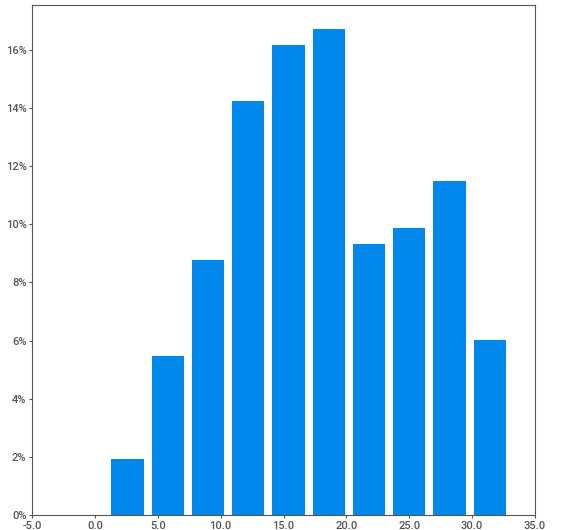
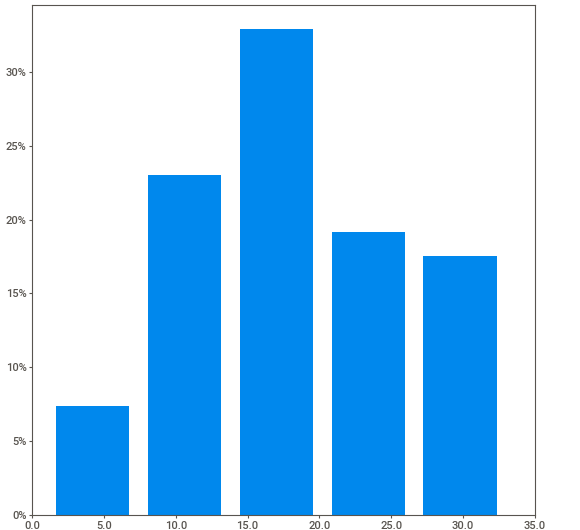
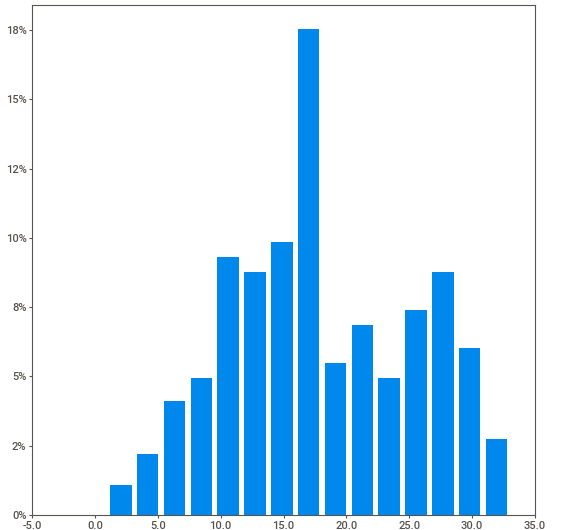
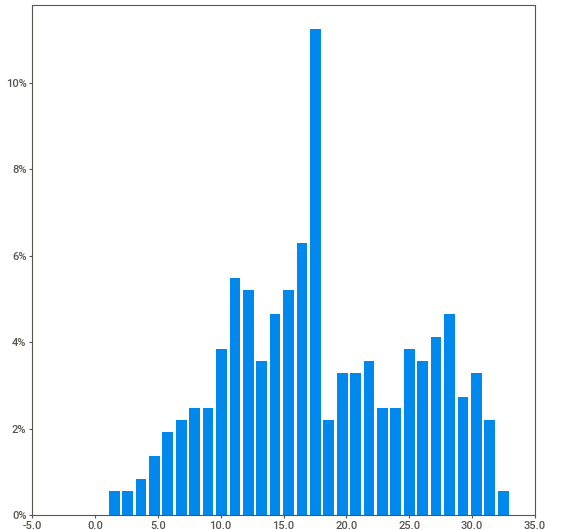
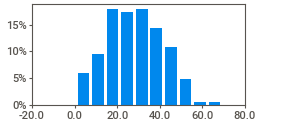
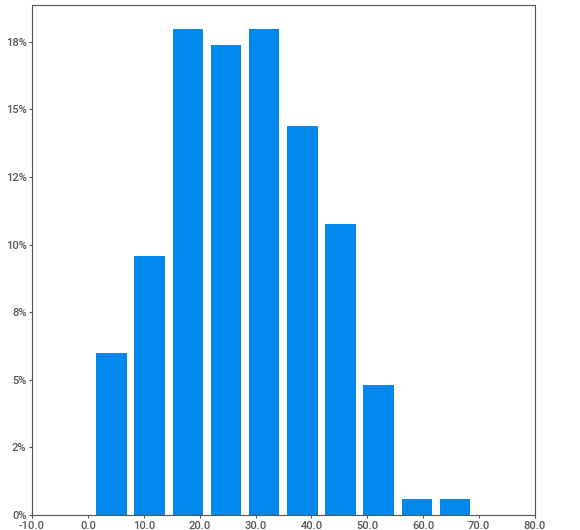
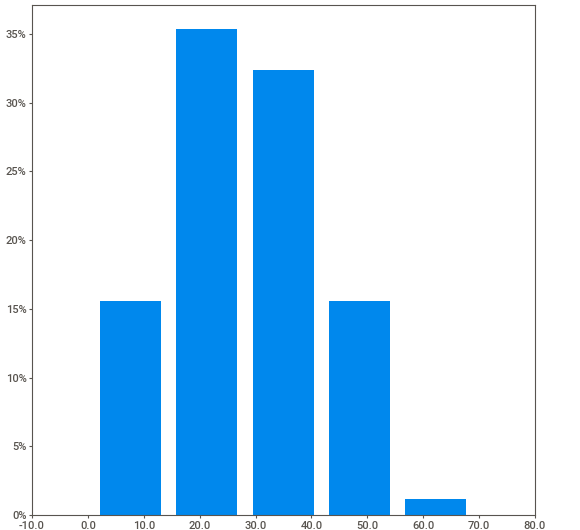
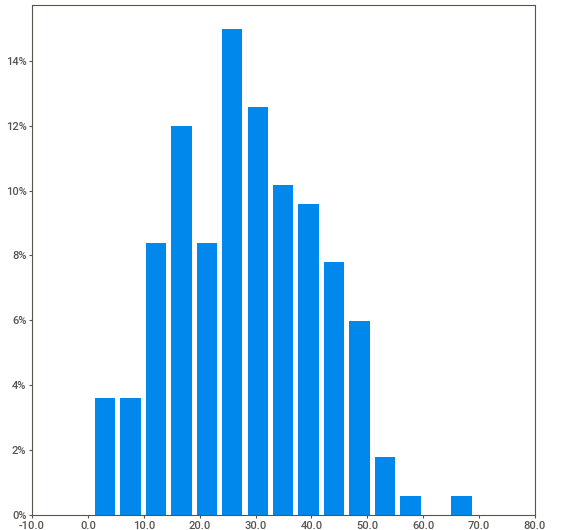
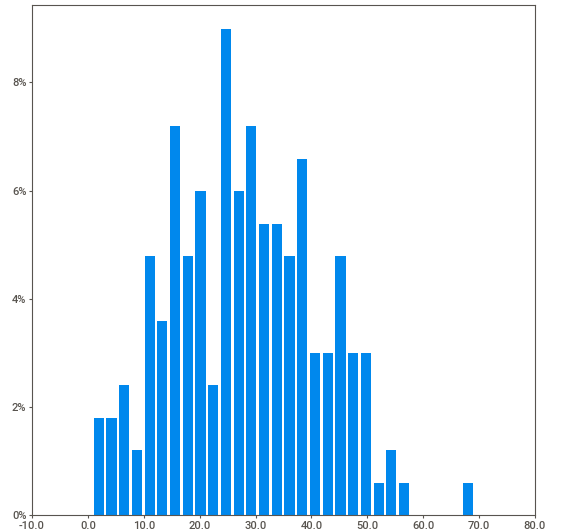
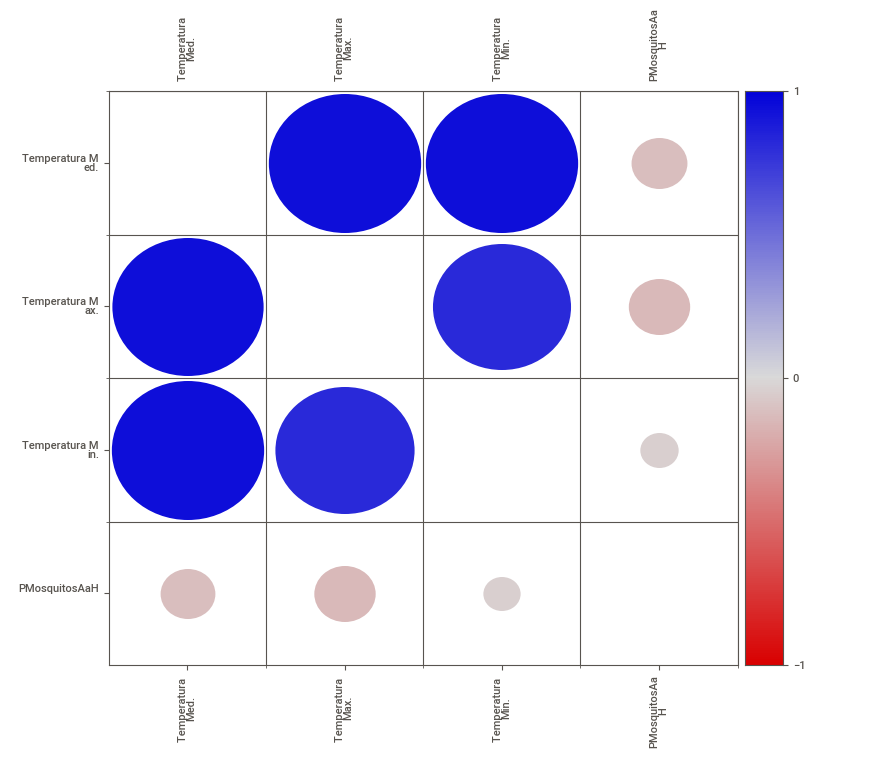
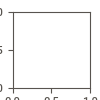

In [34]:
IPython.display.HTML('analyze.html')

# Sección nueva

# Sección nueva

In [35]:
dfR =  df4.corr ()
dfR

,Hembra_x,Macho,MosquitosT,Hembra_y,PMosquitosAaH,Temperatura Med.,Temperatura Max.,Temperatura Min.
Hembra_x,1.000000,0.598453,0.858951,0.802901,0.109813,0.121095,0.114934,0.100130
Macho,0.598453,1.000000,0.924281,0.436467,-0.317904,0.087832,0.079134,0.077745
MosquitosT,0.858951,0.924281,1.000000,0.661510,-0.150867,0.113833,0.105338,0.097397
Hembra_y,0.802901,0.436467,0.661510,1.000000,0.514030,0.030083,-0.022136,0.066224
PMosquitosAaH,0.109813,-0.317904,-0.150867,0.514030,1.000000,-0.171890,-0.202014,-0.098232
Temperatura Med.,0.121095,0.087832,0.113833,0.030083,-0.171890,1.000000,0.933105,0.922147
Temperatura Max.,0.114934,0.079134,0.105338,-0.022136,-0.202014,0.933105,1.000000,0.760058
Temperatura Min.,0.100130,0.077745,0.097397,0.066224,-0.098232,0.922147,0.760058,1.000000


No hay una relacion fuerte entre los datos de mosquitos con respecto a los datos de temoeratura 